In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#Reading data
df=pd.read_csv("https://raw.githubusercontent.com/farha-neu/cs7295/master/property_assesment.csv")

#Filtering
df = df[(df['YR_BUILT']>0)]

#categorize land property 
df['Type of Property'] = df['LU']
def editLegend(lu):
    if ((lu == 'A') | (lu == 'CD')|(lu == 'R1')|(lu =='R2')|(lu=='R3')|(lu=='R4')|(lu=='RL')):
        return "Residential"
    elif (lu == 'AH'):
        return "Agricultural/Horticultural"
    elif ((lu == 'C')|(lu == 'CC')|(lu == 'CL')):
        return "Commercial"
    elif (lu == 'CM'):
        return "Condominium main"
    elif ((lu == 'E')|(lu == 'EA')):
        return "Tax-exempt"
    elif (lu == 'I'):
        return "Industrial"
    elif (lu == 'RC'):
        return "Mixed use (res. and comm.)"
    
#Edit default legend
df['Type of Property'] = df['Type of Property'].apply(editLegend)

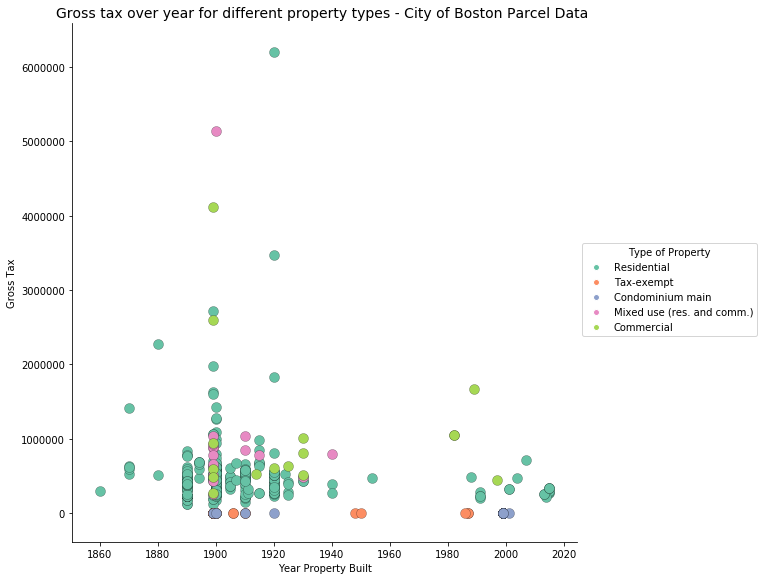

In [63]:
#Draw scatterplot with YR_BUILT in x-axis and GROSS_TAX on y-axis, hue will vary on 'Type of Property' variable
g = sns.pairplot(x_vars=['YR_BUILT'], y_vars=['GROSS_TAX'], data=df, hue="Type of Property", kind = 'scatter',palette='Set2',size=8)

#Give each points black border
g.map(plt.scatter, s=100,linewidth=.2, edgecolor="black")

#Set X and Y axis labels
g.set(xlabel='Year Property Built', ylabel='Gross Tax')

#Set the title
plt.title('Gross tax over year for different property types - City of Boston Parcel Data ',fontsize=14)

plt.show()